In [7]:
# import python  modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kaggle

In [8]:
# download dataset using Kaggle API
!kaggle datasets download -d piterfm/tokyo-2020-olympics

tokyo-2020-olympics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# extract zip file downloaded from Kaggle API
from zipfile import ZipFile
file_name = 'tokyo-2020-olympics.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
# read tokyo olympic data
# read athletes data, medal achievement data and total medals of each country
# df_athletes is a data frame to store the data from the csv files
df_athletes = pd.read_csv('athletes.csv', header=0)
df_medals = pd.read_csv('medals.csv', header=0)
df_medals_total = pd.read_csv('medals_total.csv', header=0)

# ATHLETES_EDA

CLEAN UP

In [11]:
# show first 5 rows in athletes dataset - print data so we can evaluate the contents of the file
df_athletes.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


In [12]:
#Shape[0] returns number of rows and shape[1] returns number of columns
print("the dataset has {} rows and {} columns".format(df_athletes.shape[0], df_athletes.shape[1]))

the dataset has 11656 rows and 14 columns


=> The dataset includes information of athletes participated in the Tokyo 2020 Olympics. The infor includes: name, gener, birth_date, nationality, discipline, residence place, residence country, height/ft ratio and the link for examining athelete profile.

In [13]:
# check data duplicates
df_athletes[df_athletes.duplicated()].head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url


=> no duplicated rows

In [14]:
# get columns in the dataset
df_athletes.columns

Index(['name', 'short_name', 'gender', 'birth_date', 'birth_place',
       'birth_country', 'country', 'country_code', 'discipline',
       'discipline_code', 'residence_place', 'residence_country',
       'height_m/ft', 'url'],
      dtype='object')

In [15]:
df_athletes.rename({'height_m/ft':'height_ft_ratio'}, axis=1, inplace=True)

STANDARDIZE THE DATA

In [16]:
# athelete name in 'name' columns need to be capitalized the first letter and lower other letters.
df_athletes['name'] = df_athletes['name'].apply(lambda x: x.title())
# show the first five to make sure it worked
df_athletes.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_ft_ratio,url
0,Aalerud Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,Abad Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,Abagnale Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,Abalde Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,Abalde Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


In [17]:
# get the count for each column for the athletes dataset
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               11656 non-null  object
 1   short_name         11656 non-null  object
 2   gender             11497 non-null  object
 3   birth_date         11497 non-null  object
 4   birth_place        7608 non-null   object
 5   birth_country      8320 non-null   object
 6   country            11656 non-null  object
 7   country_code       11656 non-null  object
 8   discipline         11497 non-null  object
 9   discipline_code    11656 non-null  object
 10  residence_place    7249 non-null   object
 11  residence_country  6545 non-null   object
 12  height_ft_ratio    4655 non-null   object
 13  url                11656 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB


In [18]:
# count the missing values in each columns - counting all nulls in columns
list_ath_cols = df_athletes.columns
for col in list_ath_cols:
    count = df_athletes[col].isna().sum()
    print("the '{}' column has: {} missing values".format(col, count))

the 'name' column has: 0 missing values
the 'short_name' column has: 0 missing values
the 'gender' column has: 159 missing values
the 'birth_date' column has: 159 missing values
the 'birth_place' column has: 4048 missing values
the 'birth_country' column has: 3336 missing values
the 'country' column has: 0 missing values
the 'country_code' column has: 0 missing values
the 'discipline' column has: 159 missing values
the 'discipline_code' column has: 0 missing values
the 'residence_place' column has: 4407 missing values
the 'residence_country' column has: 5111 missing values
the 'height_ft_ratio' column has: 7001 missing values
the 'url' column has: 0 missing values


=> the fields birth_place, birth_country, residence_place, residence_country have several null values but those fields are not as important
- more than 50% of athletes don't have height and weight info
- around 159 athletes don't have birth_date, gender and discipline info

In [19]:
# check athletes that don't have birth_date, gender and discipline info (verify the count 159 is accurate)
athlete_159 = df_athletes[df_athletes.gender.isna()]
list_check_cols = ["gender", "birth_date", "discipline"]
for col in list_check_cols:
    count = df_athletes[col].isna().sum()
    print("the '{}' column has: {} missing values".format(col, count))

the 'gender' column has: 159 missing values
the 'birth_date' column has: 159 missing values
the 'discipline' column has: 159 missing values


In [20]:
athlete_159.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_ft_ratio,url
167,Aicoboae Vlad,AICOBOAE V,NaN,NaN,NaN,NaN,Romania,ROU,NaN,ROW,NaN,NaN,NaN,../../../en/results/rowing/athlete-profile-n12...
186,Akhtar Muhammad Khalil,AKHTAR MK,NaN,NaN,NaN,NaN,Pakistan,PAK,NaN,SHO,NaN,NaN,NaN,../../../en/results/shooting/athlete-profile-n...
367,Amiri Nadiem,AMIRI N,NaN,NaN,NaN,NaN,Germany,GER,NaN,FBL,NaN,NaN,NaN,../../../en/results/football/athlete-profile-n...
370,Amoah Joseph Paul,AMOAH JP,NaN,NaN,NaN,NaN,Ghana,GHA,NaN,ATH,NaN,NaN,NaN,../../../en/results/athletics/athlete-profile-...
519,Arceo Mariana,ARCEO M,NaN,NaN,NaN,NaN,Mexico,MEX,NaN,MPN,NaN,NaN,NaN,../../../en/results/modern-pentathlon/athlete-...


=> 159 athletes have a lot of missing data

DEALING WITH MISSING DATA

- 159 athletes have a lot of missing info so we can remove all 159 rows
- the missing data of that columns is not as relevant so in this case we'll set it as 'No Data'

In [21]:
print("the initial athletes dataframe has {} rows, {} columns".format(df_athletes.shape[0], df_athletes.shape[1]))
# remove 159 rows
remove_idx = athlete_159.index
df_athletes = df_athletes.drop(remove_idx, axis=0)
print("Removed 159 rows that had too much missing data")
print("the athletes dataframe has {} rows, {} columns".format(df_athletes.shape[0], df_athletes.shape[1]))
# fill missing value with 'No Data'
df_athletes.fillna('No Data', inplace=True)
df_athletes.head()

the initial athletes dataframe has 11656 rows, 14 columns
Removed 159 rows that had too much missing data
the athletes dataframe has 11497 rows, 14 columns


,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_ft_ratio,url
0,Aalerud Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,No Data,No Data,No Data,../../../en/results/cycling-road/athlete-profi...
1,Abad Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,Abagnale Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,Abalde Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,No Data,No Data,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,Abalde Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,No Data,No Data,1.92/6'3'',../../../en/results/basketball/athlete-profile...


In [22]:
# drop columns: country_code, discipline_code, birth_place, residence_place
df_athletes = df_athletes.drop(['country_code', 'discipline_code', 'birth_place', 'residence_place'], axis=1)

In [23]:
# create folder to save csv file
import os
if not os.path.exists('./output'):
    os.makedirs('./output')
# replicate athlete data for saving to csv file
df_athletes_cleaned = df_athletes
df_athletes_cleaned.to_csv('./output/athletes_data.csv', header=True, index=False)

STATISTICAL ANALYSIS & VISUALIZATION

1. TOP COUNTRIES HAVE THE MOST ATHLETES

In [24]:
# because of some athletes in the athletes dataframe can participate in many events of a discipline
# so we have to get the distinct info of each athlete.
# create data
df_athletes_distinct = df_athletes[['name', 'gender', 'birth_date', 'country']]
print("Number of athletes before get distinct value:", df_athletes_distinct.shape[0])
# drop duplicated athletes
df_athletes_distinct = df_athletes_distinct.drop_duplicates()
print("Number of athletes after get distinct value:", df_athletes_distinct.shape[0])
df_athletes_distinct.head()

Number of athletes before get distinct value: 11497
Number of athletes after get distinct value: 11486


,name,gender,birth_date,country
0,Aalerud Katrine,Female,1994-12-04,Norway
1,Abad Nestor,Male,1993-03-29,Spain
2,Abagnale Giovanni,Male,1995-01-11,Italy
3,Abalde Alberto,Male,1995-12-15,Spain
4,Abalde Tamara,Female,1989-02-06,Spain


In [25]:
# Number of contries and territories participate in Tokyo Olympic
df_athletes['country'].nunique()

206

In [26]:
# number of athletes
df_athletes_distinct['name'].count()

11486

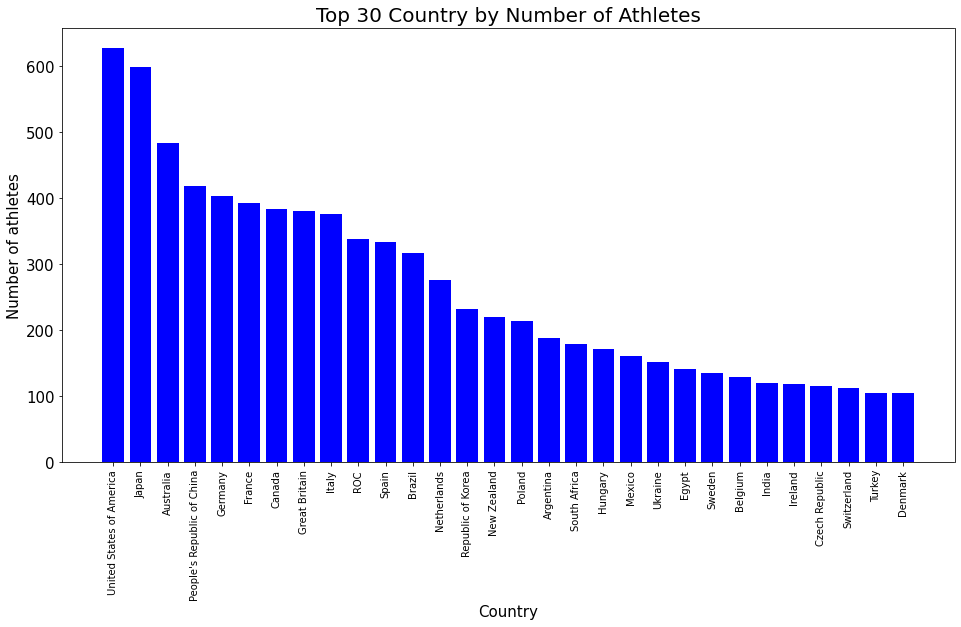

In [27]:
# top 30 countries that have the most athletes
y = df_athletes_distinct.country.value_counts().values[0:30]
x = df_athletes_distinct.country.value_counts().index[0:30]
plt.figure(figsize=(16,8))
plt.bar(x,y, color = 'blue' )
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of athletes", fontsize=15)
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.title("Top 30 Country by Number of Athletes", size = 20)
plt.show()

In [28]:
# total athlete of the top 30 countries:
print("top 30 countries have {} athletes".format(y.sum()))
print("Total athletes:", df_athletes_distinct.shape[0])

top 30 countries have 7931 athletes
Total athletes: 11486


-> we can see that top 30 countries have 7931/11486 athletes, equipvalent 69% total athletes

2. GENDER RATIO

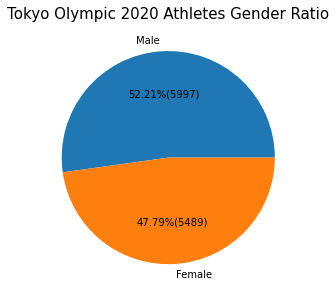

In [29]:
# gender ratio using pie chart
plt.figure(figsize=(4,4))
plt.pie(x=df_athletes_distinct['gender'].value_counts().values, 
        labels=df_athletes_distinct['gender'].value_counts().index, 
        autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*df_athletes_distinct['gender'].shape[0]))
plt.tight_layout()
plt.title("Tokyo Olympic 2020 Athletes Gender Ratio", fontsize=15)
plt.show()

=> Athletes gender ratio is pretty balance

3. DISCIPLINE STATS

In [30]:
# Number of disciplines
df_athletes['discipline'].nunique()

46

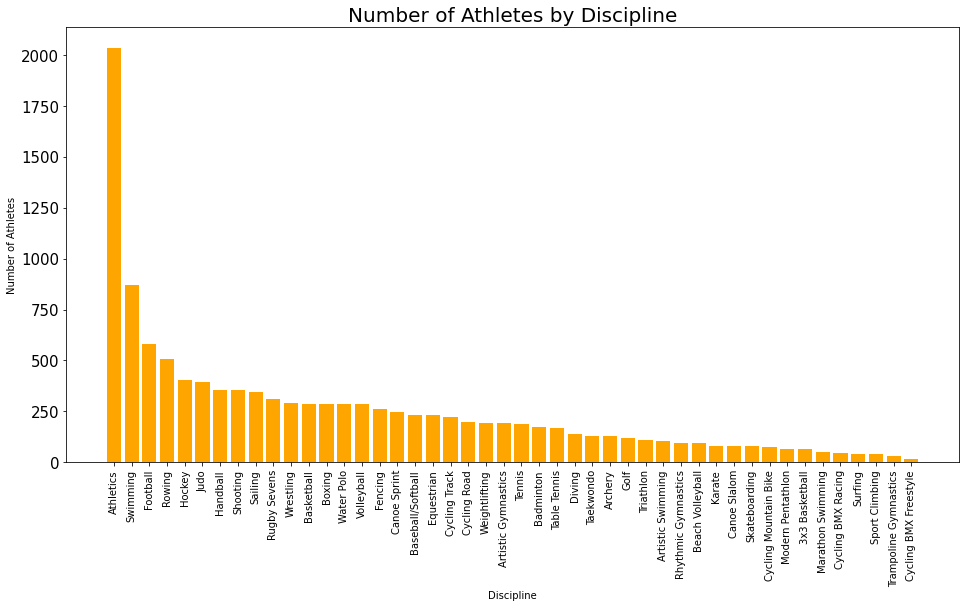

In [31]:
# Number of athletes by discipline
y = df_athletes.discipline.value_counts().values
x = df_athletes.discipline.value_counts().index
plt.figure(figsize=(16,8))
plt.bar(x,y, color = 'orange')
plt.xlabel("Discipline")
plt.ylabel("Number of Athletes")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.title("Number of Athletes by Discipline", size = 20)
plt.show()

=> Athletics is the sport with the most participants (2033 people), swimming and football are the next most popular.
Freestyle BMX cycling is the sport with the fewest participants (18 people)

4. EXAMINING ATHLETIC WITH ATHLETES AND COUNTRY

In [32]:
# get all athletes take part in Athletics
df_athletes_Athletics = df_athletes[df_athletes['discipline'] == 'Athletics']
# show top 10 countries have the most athlete take part in Athletics
df_athletes_Athletics["country"].value_counts().head(10)

United States of America    131
Germany                      91
Great Britain                78
Italy                        75
Japan                        68
Poland                       67
France                       63
Australia                    63
Canada                       56
Spain                        56
Name: country, dtype: int64

=> These countries also have the most athletes participated in Tokyo Olympic 2021

5. DISCIPLINE AND GENDER RATIO

In [33]:
# create a dataframe contains discipline and its total athletic gender
df_athletes_pivot = df_athletes.pivot_table(index='discipline', columns='gender', values = 'country', aggfunc='count', fill_value = 0)
df_athletes_pivot.head()

gender,Female,Male
discipline,,
3x3 Basketball,32,32
Archery,64,63
Artistic Gymnastics,98,95
Artistic Swimming,104,0
Athletics,956,1077


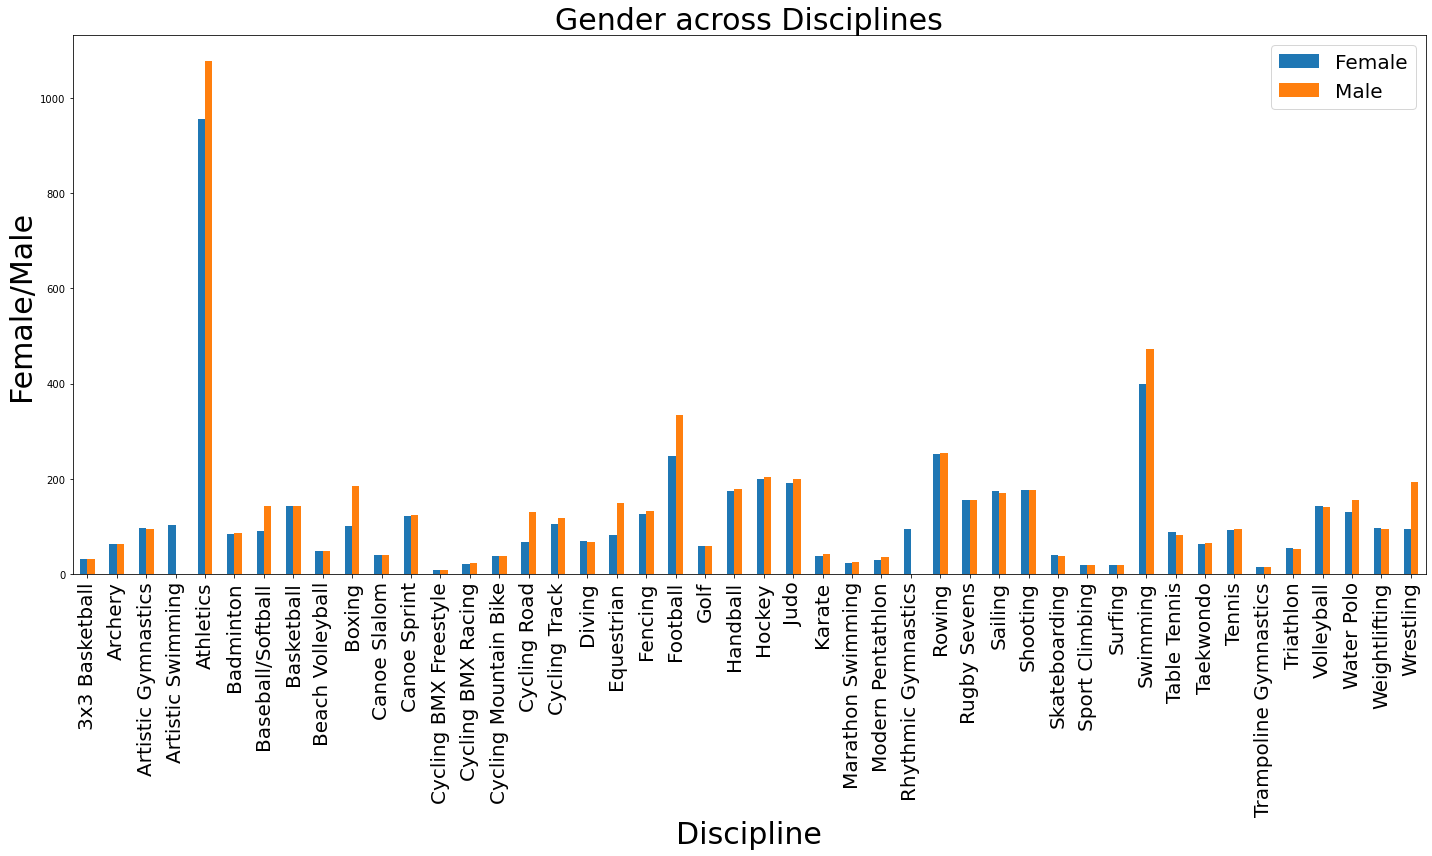

In [34]:
# gender and discipline bar plot
df_athletes_pivot.plot.bar(rot=0, figsize=(20,12))
plt.xlabel("Discipline", fontsize=30)
plt.ylabel("Female/Male", fontsize=30)
plt.title("Gender across Disciplines", fontsize=30)
plt.xticks(rotation='vertical',size=10, fontsize  = 20)
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

- Mainly disciplines have a higher proportion of men than women
- the percentage of sports with a larger number of female athletes than men is small (accounting for about 28%).
- 2 disciplines, Artistic Swimming and Rhythmic Gymnastics, only female athletes can participate.

6. TOP 10 DISCIPLINES HAVE THE MOST MALE/FEMALE ATHLETES PARTICIPATED IN

In [35]:
# create value in pie chart
df_gender_sortedFemale = df_athletes_pivot.reset_index().sort_values(by = ['Female'],ascending=False).iloc[:10]
df_gender_sortedMale = df_athletes_pivot.reset_index().sort_values(by = ['Male'],ascending=False).iloc[:10]
# create label in pie chart
labels_Female = np.array(df_gender_sortedFemale['discipline'].values,dtype = np.str)
labels_Male = np.array(df_gender_sortedMale['discipline'].values,dtype = np.str)

<ipython-input-35-ea750224717a>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_Female = np.array(df_gender_sortedFemale['discipline'].values,dtype = np.str)
<ipython-input-35-ea750224717a>:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_Male = np.array(df_gender_sortedMale['discipline'].values,dtype = np.str)


In [36]:
df_gender_sortedFemale.head()

gender,discipline,Female,Male
4,Athletics,956,1077
36,Swimming,399,473
29,Rowing,252,255
20,Football,248,334
23,Hockey,201,205


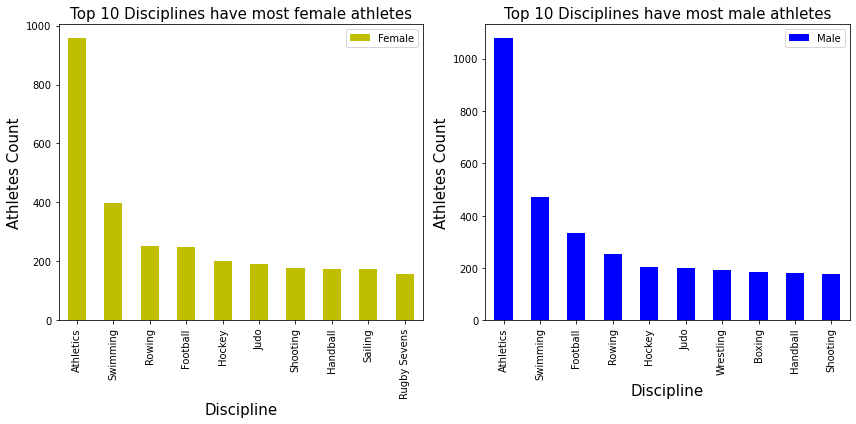

In [37]:
# create bar chart
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
df_gender_sortedFemale.plot.bar(x='discipline', y='Female', ax=ax1, color='y')
ax1.set_title('Top 10 Disciplines have most female athletes', fontsize=15)
ax1.set_ylabel('Athletes Count', fontsize=15)
ax1.set_xlabel('Discipline',fontsize=15)
df_gender_sortedMale.plot.bar(x='discipline', y='Male', ax=ax2, color='b')
ax2.set_ylabel('Athletes Count', fontsize=15)
ax2.set_title('Top 10 Disciplines have most male athletes', fontsize=15)
ax2.set_xlabel('Discipline',fontsize=15)
fig.tight_layout()
plt.show()

=> Most sports have a higher percentage of men than women, but two sports, Artistic Swimming and Rhythmic Gymnastics, only women participate in Boxing and Wresting has the majority of men participating. The special thing is that Rugby Seven and Handball are attended by more women than men

# MEDALS_TOTAL_EDA

In [38]:
# medal_total data
df_medals_total.head()

,Rank,Country Code,Gold Medal,Silver Medal,Bronze Medal,Total,Country
0,1,USA,39,41,33,113,United States of America
1,2,CHN,38,32,18,88,People's Republic of China
2,3,JPN,27,14,17,58,Japan
3,4,GBR,22,21,22,65,Great Britain
4,5,ROC,20,28,23,71,ROC


CLEAN DATA

In [39]:
# data info
df_medals_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          93 non-null     int64 
 1   Country Code  93 non-null     object
 2   Gold Medal    93 non-null     int64 
 3   Silver Medal  93 non-null     int64 
 4   Bronze Medal  93 non-null     int64 
 5   Total         93 non-null     int64 
 6   Country       93 non-null     object
dtypes: int64(5), object(2)
memory usage: 5.2+ KB


=> no missing value

In [40]:
# get list columns of medal total dataframe
df_medals_total.columns

Index(['Rank', 'Country Code', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
       'Total', 'Country'],
      dtype='object')

In [41]:
# Country value in the 87th row contains ascii value => we need to replace with another value
df_medals_total.loc[87, "Country"]

"Côte d'Ivoire"

In [42]:
# replace this value
df_medals_total.loc[87, "Country"] = "Cote d'Ivoire"

=> The name of all columns are correct

In [43]:
# rename columns
df_medals_total = df_medals_total.rename({'Country Code':'Country_Code', 'Gold Medal':'Gold_Medal', 
                                          'Silver Medal':'Silver_Medal', 'Bronze Medal':'Bronze_Medal', 'Rank':'Top'}, axis=1)
df_medals_total.head()

,Top,Country_Code,Gold_Medal,Silver_Medal,Bronze_Medal,Total,Country
0,1,USA,39,41,33,113,United States of America
1,2,CHN,38,32,18,88,People's Republic of China
2,3,JPN,27,14,17,58,Japan
3,4,GBR,22,21,22,65,Great Britain
4,5,ROC,20,28,23,71,ROC


In [44]:
# relicate total medal data for saving to csv file
df_medals_total_cleaned = df_medals_total
df_medals_total_cleaned.to_csv('./output/medal_rank_data.csv', header=True, index=False)

STATISTICAL ANALYSIS & VISUALIZATION

In [45]:
# data shape: 93 rows, 7 columns
df_medals_total.shape

(93, 7)

=> 93 countries have at least 1 medal

In [46]:
# total medal statistic
df_medals_total.Total.describe()

count     93.000000
mean      11.612903
std       19.091332
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      113.000000
Name: Total, dtype: float64

In [47]:
# gold medal statistic
df_medals_total['Gold_Medal'].describe()

count    93.000000
mean      3.655914
std       7.022471
min       0.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      39.000000
Name: Gold_Medal, dtype: float64

1. TOP 10 COUNTRIES HAVE THE MOST MEDALS IN TOTAL

In [48]:
# create dataframe: top 10 countries have the most medal in total
df_medals_top10 = df_medals_total.sort_values(by = 'Total', ascending = False)[0:10][['Country', 'Gold_Medal', 'Silver_Medal', 'Bronze_Medal']].set_index('Country')
df_medals_top10.head(10)

,Gold_Medal,Silver_Medal,Bronze_Medal
Country,,,
United States of America,39,41,33
People's Republic of China,38,32,18
ROC,20,28,23
Great Britain,22,21,22
Japan,27,14,17
Australia,17,7,22
Italy,10,10,20
Germany,10,11,16
Netherlands,10,12,14


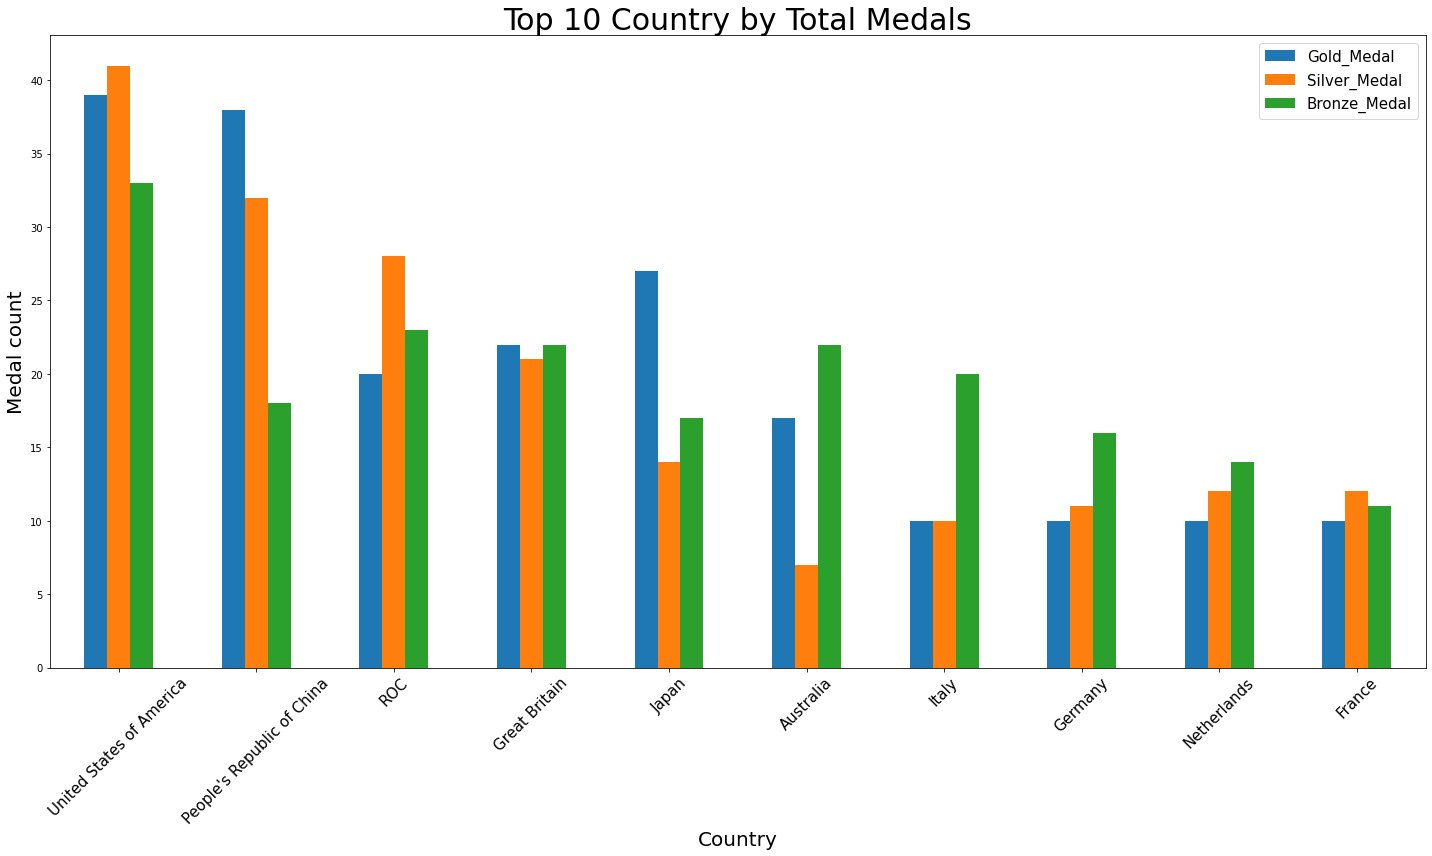

In [49]:
#Ploting of stacked bar chart
df_medals_top10.plot.bar(rot=0, figsize=(20,12))
plt.xlabel("Country", fontsize=20)
plt.ylabel("Medal count", fontsize=20)
plt.title("Top 10 Country by Total Medals", fontsize=30)
plt.xticks(rotation=45,size=10, fontsize  = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.show()

Which Country in above rank have highest gold medal ration?

In [50]:
df_medals_top10['Total'] = df_medals_top10['Gold_Medal'] + df_medals_top10['Silver_Medal'] + df_medals_top10['Bronze_Medal']
df_medals_top10['gold_medal_ratio'] = df_medals_top10['Gold_Medal']/df_medals_top10['Total']
df_medals_top10.head()

,Gold_Medal,Silver_Medal,Bronze_Medal,Total,gold_medal_ratio
Country,,,,,
United States of America,39,41,33,113,0.345133
People's Republic of China,38,32,18,88,0.431818
ROC,20,28,23,71,0.281690
Great Britain,22,21,22,65,0.338462
Japan,27,14,17,58,0.465517


In [51]:
# top 10 country have the highest ratio between gold medal and total medal achieve
df_medals_top10.sort_values('gold_medal_ratio', ascending=False).head(10)

,Gold_Medal,Silver_Medal,Bronze_Medal,Total,gold_medal_ratio
Country,,,,,
Japan,27,14,17,58,0.465517
People's Republic of China,38,32,18,88,0.431818
Australia,17,7,22,46,0.369565
United States of America,39,41,33,113,0.345133
Great Britain,22,21,22,65,0.338462
France,10,12,11,33,0.303030
ROC,20,28,23,71,0.281690
Netherlands,10,12,14,36,0.277778
Germany,10,11,16,37,0.270270


- Even though Japan stay in 5th of total medal achieve but they have the highest gold medal ratio
- China stay 2th in total medal and gold medal ratio

2. WHICH COUNTRY HAVE THE HIGHEST RATIO BETWEEN GOLD MEDAL AND TOTAL MEDAL ACHIEVE?

In [52]:
df_medals_total['gold_medal_ratio'] = df_medals_total['Gold_Medal']/df_medals_total['Total']
df_medals_total.head()

,Top,Country_Code,Gold_Medal,Silver_Medal,Bronze_Medal,Total,Country,gold_medal_ratio
0,1,USA,39,41,33,113,United States of America,0.345133
1,2,CHN,38,32,18,88,People's Republic of China,0.431818
2,3,JPN,27,14,17,58,Japan,0.465517
3,4,GBR,22,21,22,65,Great Britain,0.338462
4,5,ROC,20,28,23,71,ROC,0.281690


In [53]:
# top 10 country have the highest ratio between gold medal and total medal achieve
df_medals_total.sort_values('gold_medal_ratio', ascending=False).head(10)

,Top,Country_Code,Gold_Medal,Silver_Medal,Bronze_Medal,Total,Country,gold_medal_ratio
62,63,BER,1,0,0,1,Bermuda,1.000000
42,43,KOS,2,0,0,2,Kosovo,1.000000
64,65,PUR,1,0,0,1,Puerto Rico,1.000000
41,42,BAH,2,0,0,2,Bahamas,1.000000
63,64,MAR,1,0,0,1,Morocco,1.000000
37,38,ECU,2,1,0,3,Ecuador,0.666667
40,41,QAT,2,0,1,3,Qatar,0.666667
31,32,UZB,3,0,2,5,Uzbekistan,0.600000
30,31,SLO,3,1,1,5,Slovenia,0.600000
60,61,LAT,1,0,1,2,Latvia,0.500000


=> This countries have a small number of gold medal and total medal as well, but their athletes seem very good at the discipline they participated

3. WHICH COUNTRY HAVE ATHLETES PARTICIPATED IN TOKYO OLYPIC BUT DONT HAVE ANY MEDALS?

In [54]:
# get list of country have athletes participated in Tokyo Olympic:
country_joined = df_athletes.country.unique()
country_has_medal = df_medals_total.Country.unique()
# countries dont have any medals
country_ex = np.setdiff1d(country_joined,country_has_medal)
print("There are {} countries don't have any medals".format(len(country_ex)))
print("=================================")
print(country_ex)

There are 114 countries don't have any medals
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Aruba' 'Bangladesh' 'Barbados' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brunei Darussalam' 'Burundi'
 'Cambodia' 'Cameroon' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' 'Cyprus' "Côte d'Ivoire"
 'Democratic Republic of the Congo' 'Djibouti' 'Dominique' 'EOR'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Eswatini'
 'Federated States of Micronesia' 'Gabon' 'Gambia' 'Guam' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Iceland' 'Iraq'
 'Kiribati' 'LBN' "Lao People's Democratic Republic" 'Lesotho' 'Liberia'
 'Libya' 'Liechtenstein' 'Luxembourg' 'Madagascar' 'Malawi' 'Maldives'
 'Mali' 'Malta' 'Marshall Islands' 'Mauritania' 'Mauritius' 'Monaco'
 'Montenegro' 'Mozambique' 'Myanmar' 'Nauru' 'Nepal' 'Nicaragua' 'Niger'
 'Oman' 'Pakistan' '

# MEDAL ACHIEVEMENT EDA

In [55]:
df_medals.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,2021-07-24 00:00:00.0,KIM JD,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
1,Gold Medal,1,2021-07-24 00:00:00.0,AN S,AN San,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2,2021-07-24 00:00:00.0,SCHLOESSER G,SCHLOESSER Gabriela,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
3,Silver Medal,2,2021-07-24 00:00:00.0,WIJLER S,WIJLER Steve,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
4,Bronze Medal,3,2021-07-24 00:00:00.0,ALVAREZ L,ALVAREZ Luis,X,../../../en/results/archery/athlete-profile-n1...,MEX,ARC,Mixed Team,Mexico,Archery


In [56]:
# medal achievemen data info
df_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   medal_type          2401 non-null   object
 1   medal_code          2401 non-null   int64 
 2   medal_date          2401 non-null   object
 3   athlete_short_name  2401 non-null   object
 4   athlete_name        2401 non-null   object
 5   athlete_sex         2401 non-null   object
 6   athlete_link        2401 non-null   object
 7   country_code        2401 non-null   object
 8   discipline_code     2401 non-null   object
 9   event               2401 non-null   object
 10  country             2401 non-null   object
 11  discipline          2401 non-null   object
dtypes: int64(1), object(11)
memory usage: 225.2+ KB


=> No missing value

In [57]:
# data shape: 2401 row, 12 columns
df_medals.shape

(2401, 12)

CLEAN DATA

In [58]:
# get date of medal date column
df_medals['medal_date'] = df_medals.medal_date.str[:10]
df_medals.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,2021-07-24,KIM JD,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
1,Gold Medal,1,2021-07-24,AN S,AN San,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2,2021-07-24,SCHLOESSER G,SCHLOESSER Gabriela,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
3,Silver Medal,2,2021-07-24,WIJLER S,WIJLER Steve,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
4,Bronze Medal,3,2021-07-24,ALVAREZ L,ALVAREZ Luis,X,../../../en/results/archery/athlete-profile-n1...,MEX,ARC,Mixed Team,Mexico,Archery


In [59]:
# check duplicated data
df_medals[df_medals.duplicated()].head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline


=> no duplicated data

In [60]:
# move unnecessary columns
df_medals.drop(['medal_code', 'discipline_code', 'country_code', 'athlete_short_name', 'athlete_sex'], axis=1, inplace=True)
df_medals.head()

,medal_type,medal_date,athlete_name,athlete_link,event,country,discipline
0,Gold Medal,2021-07-24,KIM Je Deok,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Republic of Korea,Archery
1,Gold Medal,2021-07-24,AN San,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2021-07-24,SCHLOESSER Gabriela,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Netherlands,Archery
3,Silver Medal,2021-07-24,WIJLER Steve,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Netherlands,Archery
4,Bronze Medal,2021-07-24,ALVAREZ Luis,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Mexico,Archery


In [61]:
# athelete_name columns need to be capitalized the first letter and lower other letters.
df_medals['athlete_name'] = df_medals['athlete_name'].apply(lambda x: x.title())
df_medals.head()

,medal_type,medal_date,athlete_name,athlete_link,event,country,discipline
0,Gold Medal,2021-07-24,Kim Je Deok,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Republic of Korea,Archery
1,Gold Medal,2021-07-24,An San,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2021-07-24,Schloesser Gabriela,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Netherlands,Archery
3,Silver Medal,2021-07-24,Wijler Steve,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Netherlands,Archery
4,Bronze Medal,2021-07-24,Alvarez Luis,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Mexico,Archery


In [62]:
# replicate medal achievement data for saving to csv file
df_medals_cleaned = df_medals
df_medals_cleaned.to_csv('./output/medal_achievement_data.csv', header=True, index=False)

STATISTICAL ANALYSIS & VISUALIZATION

In [63]:
# Count total gave medal
df_medals.medal_type.value_counts()

Bronze Medal    850
Gold Medal      781
Silver Medal    770
Name: medal_type, dtype: int64

In [64]:
# Count total medal had given base on date
df_medals_by_date = df_medals.pivot_table(values='country', index='medal_date', columns='medal_type', aggfunc='count')
df_medals_by_date['Total gave'] = df_medals_by_date['Bronze Medal'] + df_medals_by_date['Gold Medal'] + df_medals_by_date['Silver Medal']
df_medals_by_date.sort_values('Total gave', ascending=False).head()

medal_type,Bronze Medal,Gold Medal,Silver Medal,Total gave
medal_date,,,,
2021-08-07,154,158,152,464
2021-08-06,78,71,73,222
2021-07-31,83,60,58,201
2021-07-28,66,63,64,193
2021-08-08,61,66,65,192


=> Top 5 days had given the most medals

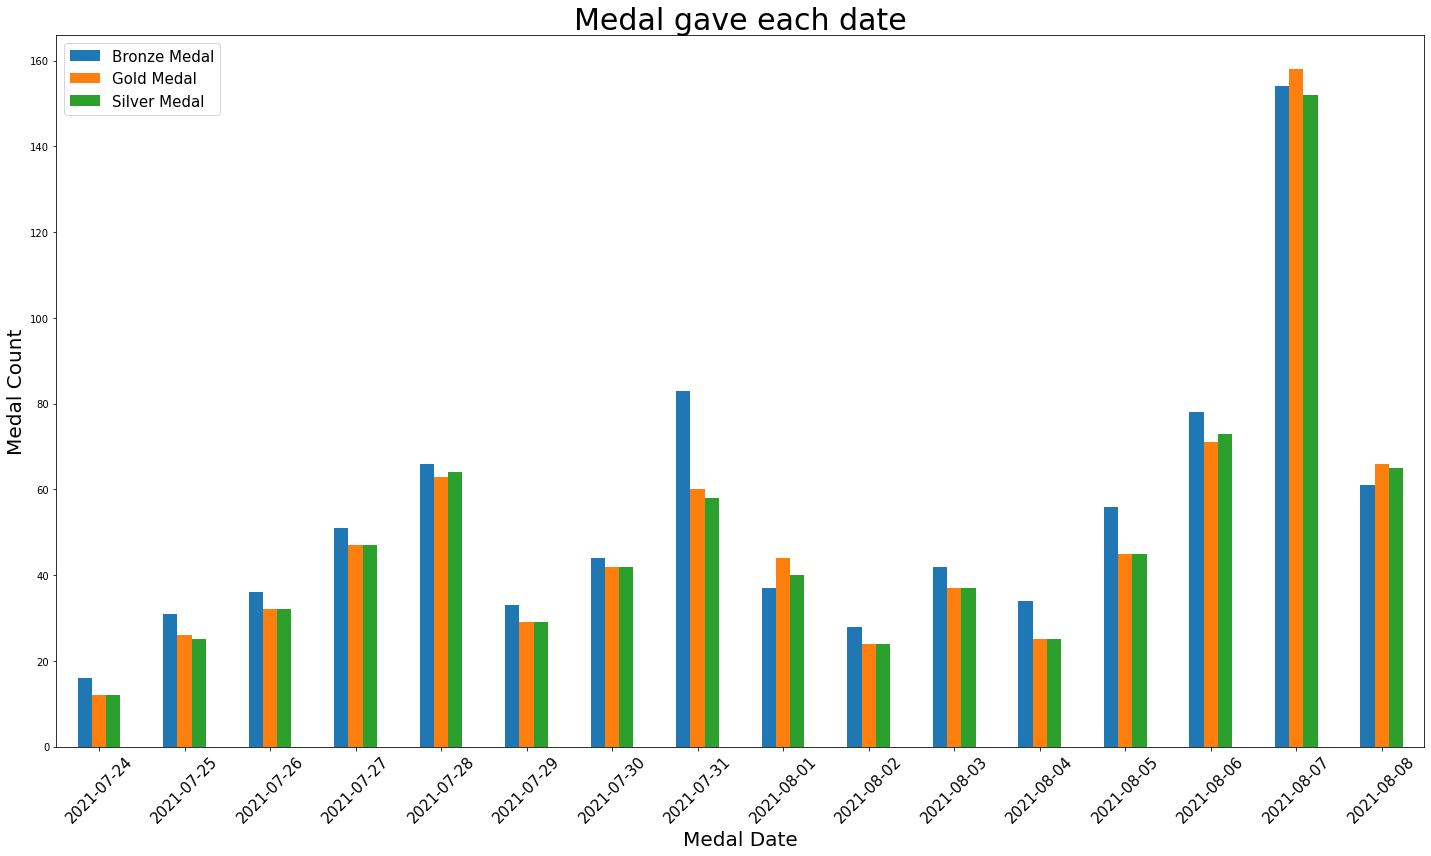

In [65]:
#Ploting of stacked bar chart
df_medals_by_date.drop(['Total gave'],axis=1, inplace=True)
df_medals_by_date.plot.bar(rot=0, figsize=(20,12))
plt.xlabel("Medal Date", fontsize=20)
plt.ylabel("Medal Count", fontsize=20)
plt.title("Medal gave each date", fontsize=30)
plt.xticks(rotation=45,size=10, fontsize  = 15)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.show()

In [66]:
# create dataframe pivot for count the total medal type of each discipline
df_medal_pivot = df_medals.pivot_table(index='discipline', columns='medal_type', values = 'country', aggfunc='count', fill_value = 0)
df_medal_pivot['Total medal'] = df_medal_pivot['Bronze Medal'] + df_medal_pivot['Gold Medal'] + df_medal_pivot['Silver Medal']
df_medal_pivot.head()

medal_type,Bronze Medal,Gold Medal,Silver Medal,Total medal
discipline,,,,
3x3 Basketball,8,8,8,24
Archery,10,10,10,30
Artistic Gymnastics,21,20,20,61
Artistic Swimming,10,10,10,30
Athletics,69,76,67,212


1. Which discipline has the most medals?

In [67]:
df_medal_pivot.sort_values('Total medal', ascending=False).head()

medal_type,Bronze Medal,Gold Medal,Silver Medal,Total medal
discipline,,,,
Athletics,69,76,67,212
Swimming,71,70,67,208
Rowing,48,48,48,144
Football,44,44,44,132
Baseball/Softball,39,39,39,117


=> Athletics, swimming, Rowsing, Football, Baseball are 5 disciplines have the most medals

In [68]:
df_medal_pivot.sort_values('Total medal', ascending=True).head()

medal_type,Bronze Medal,Gold Medal,Silver Medal,Total medal
discipline,,,,
Modern Pentathlon,2,2,2,6
Marathon Swimming,2,2,2,6
Sport Climbing,2,2,2,6
Trampoline Gymnastics,2,2,2,6
Surfing,2,2,2,6


=> Modern Pentathlon, Marathon Swimming, Sport Climbing, Trampoline Gymnastics, Surfing are 5 disciplines have least medals

In [69]:
# Who achieve most gold medals
df_indv_achieve = df_medals.pivot_table(index='athlete_name', columns='medal_type', values='country', aggfunc='count', fill_value=0)
df_indv_achieve.sort_values(['Gold Medal', 'Silver Medal', 'Bronze Medal'], ascending=False, inplace=True)
df_indv_achieve = df_indv_achieve[['Gold Medal', 'Silver Medal', 'Bronze Medal']]
# top 10 athletes achieve most gold medal
df_indv_achieve.head(10)

medal_type,Gold Medal,Silver Medal,Bronze Medal
athlete_name,,,
Dressel Caeleb,5,0,0
Mckeon Emma,4,0,3
Mckeown Kaylee,3,0,1
An San,3,0,0
Carrington Lisa,3,0,0
Thompson-Herah Elaine,3,0,0
Ledecky Kathleen,2,2,0
Zhang Yufei,2,2,0
Titmus Ariarne,2,1,1


In [70]:
# Top 10 athletes have most total of medal
df_indv_achieve['Total Achieve'] = df_indv_achieve['Gold Medal'] + df_indv_achieve['Silver Medal'] + df_indv_achieve['Bronze Medal']
df_indv_achieve.sort_values(['Total Achieve'], ascending=False).head(10)

medal_type,Gold Medal,Silver Medal,Bronze Medal,Total Achieve
athlete_name,,,,
Mckeon Emma,4,0,3,7
Dressel Caeleb,5,0,0,5
Mckeown Kaylee,3,0,1,4
Ledecky Kathleen,2,2,0,4
Zhang Yufei,2,2,0,4
Titmus Ariarne,2,1,1,4
Scott Duncan,1,3,0,4
Macneil Margaret,1,1,1,3
Melnikova Angelina,1,0,2,3


In [71]:
import sqlite3

In [72]:
con = sqlite3.connect("C:\\Users\\Madao\\Downloads\\Final_project.db")

In [76]:
df_athletes_cleaned.to_sql("df_athletes_cleaned",con,if_exists="append",index=False)

In [75]:
df_medals_total_cleaned.to_sql("df_medals_total_cleaned",con,if_exists="append",index=False)

In [78]:
df_medals_cleaned.to_sql("df_medals_cleaned",con,if_exists="append",index=False)

,name,short_name,gender,birth_date,birth_country,country,discipline,residence_country,height_ft_ratio,url
0,Aalerud Katrine,AALERUD K,Female,1994-12-04,Norway,Norway,Cycling Road,No Data,No Data,../../../en/results/cycling-road/athlete-profi...
1,Abad Nestor,ABAD N,Male,1993-03-29,Spain,Spain,Artistic Gymnastics,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,Abagnale Giovanni,ABAGNALE G,Male,1995-01-11,Italy,Italy,Rowing,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,Abalde Alberto,ABALDE A,Male,1995-12-15,Spain,Spain,Basketball,No Data,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,Abalde Tamara,ABALDE T,Female,1989-02-06,Spain,Spain,Basketball,No Data,1.92/6'3'',../../../en/results/basketball/athlete-profile...
...,...,...,...,...,...,...,...,...,...,...
22989,Zwicker Martin Detlef,ZWICKER MD,Male,1987-02-27,Germany,Germany,Hockey,No Data,1.76/5'9'',../../../en/results/hockey/athlete-profile-n13...
22990,Zwolinska Klaudia,ZWOLINSKA K,Female,1998-12-18,No Data,Poland,Canoe Slalom,Poland,No Data,../../../en/results/canoe-slalom/athlete-profi...
22991,Zykova Yulia,ZYKOVA Y,Female,1995-11-25,Russian Federation,ROC,Shooting,Russian Federation,No Data,../../../en/results/shooting/athlete-profile-n...
22992,Zyuzina Ekaterina,ZYUZINA E,Female,1996-12-08,Russian Federation,ROC,Sailing,Russian Federation,No Data,../../../en/results/sailing/athlete-profile-n1...


In [81]:
pd.read_sql("select * from df_medals_cleaned",con)

,medal_type,medal_date,athlete_name,athlete_link,event,country,discipline
0,Gold Medal,2021-07-24,Kim Je Deok,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Republic of Korea,Archery
1,Gold Medal,2021-07-24,An San,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2021-07-24,Schloesser Gabriela,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Netherlands,Archery
3,Silver Medal,2021-07-24,Wijler Steve,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Netherlands,Archery
4,Bronze Medal,2021-07-24,Alvarez Luis,../../../en/results/archery/athlete-profile-n1...,Mixed Team,Mexico,Archery
...,...,...,...,...,...,...,...
2396,Bronze Medal,2021-08-08,Nagy Viktor,../../../en/results/water-polo/athlete-profile...,Men,Hungary,Water Polo
2397,Bronze Medal,2021-08-08,Vamos Marton,../../../en/results/water-polo/athlete-profile...,Men,Hungary,Water Polo
2398,Bronze Medal,2021-08-08,Varga Denes,../../../en/results/water-polo/athlete-profile...,Men,Hungary,Water Polo
2399,Bronze Medal,2021-08-08,Vogel Soma,../../../en/results/water-polo/athlete-profile...,Men,Hungary,Water Polo
